In [1]:
import numpy as np ## for mathematical application and data analysis
import pandas as pd ## for loading data and reading data as a data frame
import matplotlib.pyplot as plt ## for data visusalisation
%matplotlib inline
import seaborn as sns ## for data visualisation
import os #for loading data (csv files e.t.c)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_stata('DataDrive2030_PD_EXTERNAL.dta') 

In [3]:
df.head(1)

,child_id,data_year,data_source,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_score_item_1,child_score_item_2,child_score_item_3,child_score_item_4,child_domain_1,child_score_item_5,child_score_item_6,child_score_item_7,child_score_item_8,child_domain_2,child_score_item_9,child_score_item_10,child_score_item_11,child_score_item_12,child_score_item_13,child_domain_3,child_score_item_14,child_score_item_15,child_score_item_16,child_score_item_17,child_domain_4,child_score_item_18,child_score_item_19,child_score_item_20,child_score_item_21,child_score_item_22,child_score_item_23,child_domain_5,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_total_elom,child_total_elom_cuts,child_domain_1_cuts,child_domain_2_cuts,child_domain_3_cuts,child_domain_4_cuts,child_domain_5_cuts,child_gender,child_sample_wgt,child_dob,child_age_w2,child_date_w2,child_score_item_1_w2,child_score_item_2_w2,child_score_item_3_w2,child_score_item_4_w2,child_domain_1_w2,child_score_item_5_w2,child_score_item_6_w2,child_score_item_7_w2,child_score_item_8_w2,child_domain_2_w2,child_score_item_9_w2,child_score_item_10_w2,child_score_item_11_w2,child_score_item_12_w2,child_score_item_13_w2,child_domain_3_w2,child_score_item_14_w2,child_score_item_15_w2,child_score_item_16_w2,child_score_item_17_w2,child_domain_4_w2,child_score_item_18_w2,child_score_item_19_w2,child_score_item_20_w2,child_score_item_21_w2,child_score_item_22_w2,child_score_item_23_w2,child_domain_5_w2,child_total_elom_w2,child_height_w2,child_observe_attentive_w2,child_observe_concentrated_w2,child_observe_diligent_w2,child_observe_interested_w2,child_observe_total_w2,child_has_sibling,child_spectacles,child_conditions,child_age_group,child_zha,child_zha_w2,child_stunted,child_stunted_w2,PD_1_INT_total_elom_CHILD,PD_1_INT_domain_1_CHILD,PD_1_INT_domain_2_CHILD,PD_1_INT_domain_3_CHILD,PD_1_INT_domain_4_CHILD,PD_1_INT_domain_5_CHILD,PD_2_INT_CHILD,PD_4_INT_CHILD,PD_1_INT_total_elom_facility,PD_1_INT_domain_1_facility,PD_1_INT_domain_2_facility,PD_1_INT_domain_3_facility,PD_1_INT_domain_4_facility,PD_1_INT_domain_5_facility,PD_2_INT_pc_all_ontrack_facility,PD_3_INT_pc_ontrack_facility,PD_4_INT_composite_facility,PD_1_INT_total_elom_ward,PD_1_INT_domain_1_ward,PD_1_INT_domain_2_ward,PD_1_INT_domain_3_ward,PD_1_INT_domain_4_ward,PD_1_INT_domain_5_ward,PD_2_INT_pc_all_ontrack_ward,PD_3_INT_pc_ontrack_ward,PD_4_INT_composite_ward,PD_1_INT_total_elom_dc,PD_1_INT_domain_1_dc,PD_1_INT_domain_2_dc,PD_1_INT_domain_3_dc,PD_1_INT_domain_4_dc,PD_1_INT_domain_5_dc,PD_2_INT_pc_all_ontrack_dc,PD_3_INT_pc_ontrack_dc,PD_4_INT_composite_dc,PD_1_INT_total_elom_mn,PD_1_INT_domain_1_mn,PD_1_INT_domain_2_mn,PD_1_INT_domain_3_mn,PD_1_INT_domain_4_mn,PD_1_INT_domain_5_mn,PD_2_INT_pc_all_ontrack_mn,PD_3_INT_pc_ontrack_mn,PD_4_INT_composite_mn,PD_1_INT_total_facility,PD_1_INT_total_ward,PD_1_INT_total_mn,PD_1_INT_total_dc,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pr

In [4]:
new_df = df.copy()

In [ ]:
PD_1_INT_total_elom_CHILD	PD_1_INT_domain_1_CHILD	PD_1_INT_domain_2_CHILD	PD_1_INT_domain_3_CHILD
PD_1_INT_domain_4_CHILD	PD_1_INT_domain_5_CHILD	PD_2_INT_CHILD	PD_4_INT_CHILD	PD_1_INT_total_elom_facility	
PD_1_INT_domain_1_facility	PD_1_INT_domain_2_facility	PD_1_INT_domain_3_facility	PD_1_INT_domain_4_facility
PD_1_INT_domain_5_facility	PD_2_INT_pc_all_ontrack_facility	PD_3_INT_pc_ontrack_facility	PD_4_INT_composite_facility	
PD_1_INT_total_elom_ward	PD_1_INT_domain_1_ward	PD_1_INT_domain_2_ward	PD_1_INT_domain_3_ward	PD_1_INT_domain_4_ward	
PD_1_INT_domain_5_ward	PD_2_INT_pc_all_ontrack_ward	PD_3_INT_pc_ontrack_ward	PD_4_INT_composite_ward	PD_1_INT_total_elom_dc	
PD_1_INT_domain_1_dc	PD_1_INT_domain_2_dc	PD_1_INT_domain_3_dc	PD_1_INT_domain_4_dc	PD_1_INT_domain_5_dc	
PD_2_INT_pc_all_ontrack_dc	PD_3_INT_pc_ontrack_dc	PD_4_INT_composite_dc	PD_1_INT_total_elom_mn	PD_1_INT_domain_1_mn	
PD_1_INT_domain_2_mn	PD_1_INT_domain_3_mn	PD_1_INT_domain_4_mn	PD_1_INT_domain_5_mn	PD_2_INT_pc_all_ontrack_mn	
PD_3_INT_pc_ontrack_mn	PD_4_INT_composite_mn	PD_1_INT_total_facility	PD_1_INT_total_ward	PD_1_INT_total_mn	PD_1_INT_total_dc

### ELOM_CHILD

In [28]:
Elom_child = new_df[['PD_1_INT_total_elom_CHILD','PD_1_INT_domain_1_CHILD','PD_1_INT_domain_2_CHILD','PD_1_INT_domain_3_CHILD','PD_1_INT_domain_4_CHILD','PD_1_INT_domain_5_CHILD']]
Elom_child.head()

,PD_1_INT_total_elom_CHILD,PD_1_INT_domain_1_CHILD,PD_1_INT_domain_2_CHILD,PD_1_INT_domain_3_CHILD,PD_1_INT_domain_4_CHILD,PD_1_INT_domain_5_CHILD
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [29]:
#Check for null values
Elom_child.isnull().sum()

PD_1_INT_total_elom_CHILD    0
PD_1_INT_domain_1_CHILD      0
PD_1_INT_domain_2_CHILD      0
PD_1_INT_domain_3_CHILD      0
PD_1_INT_domain_4_CHILD      0
PD_1_INT_domain_5_CHILD      0
dtype: int64

In [30]:
Elom_child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 11821
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PD_1_INT_total_elom_CHILD  11822 non-null  category
 1   PD_1_INT_domain_1_CHILD    11822 non-null  category
 2   PD_1_INT_domain_2_CHILD    11822 non-null  category
 3   PD_1_INT_domain_3_CHILD    11822 non-null  category
 4   PD_1_INT_domain_4_CHILD    11822 non-null  category
 5   PD_1_INT_domain_5_CHILD    11822 non-null  category
dtypes: category(6)
memory usage: 420.4 KB


In [27]:
Elom_child['PD_1_INT_total_elom_CHILD'].value_counts()

Non-deviant         11651
Positive deviant      171
Name: PD_1_INT_total_elom_CHILD, dtype: int64

In [17]:
Elom_child['PD_1_INT_domain_1_CHILD'].value_counts()

Non-deviant         11451
Positive deviant      371
Name: PD_1_INT_domain_1_CHILD, dtype: int64

In [18]:
Elom_child['PD_1_INT_domain_2_CHILD'].value_counts()

Non-deviant         11632
Positive deviant      190
Name: PD_1_INT_domain_2_CHILD, dtype: int64

In [20]:
Elom_child['PD_1_INT_domain_3_CHILD'].value_counts()

Non-deviant         11497
Positive deviant      325
Name: PD_1_INT_domain_3_CHILD, dtype: int64

In [21]:
Elom_child['PD_1_INT_domain_4_CHILD'].value_counts()

Non-deviant         11441
Positive deviant      381
Name: PD_1_INT_domain_4_CHILD, dtype: int64

In [22]:
Elom_child['PD_1_INT_domain_5_CHILD'].value_counts()

Non-deviant         11728
Positive deviant       94
Name: PD_1_INT_domain_5_CHILD, dtype: int64

In [14]:
def my_recode(column):
    #df = Obs_df
    if column == "Non-deviant":
        return 0
    else: 
        column == "Positive deviant"
        return 1

In [32]:
#Categorical variables
#recode and transform to numerical variables
Elom_child['PD_1_INT_total_elom_CHILDc'] = Elom_child['PD_1_INT_total_elom_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_1_CHILDc'] = Elom_child['PD_1_INT_domain_1_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_2_CHILDc'] = Elom_child['PD_1_INT_domain_2_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_3_CHILDc'] = Elom_child['PD_1_INT_domain_3_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_4_CHILDc'] = Elom_child['PD_1_INT_domain_4_CHILD'].apply(my_recode)
Elom_child['PD_1_INT_domain_5_CHILDc'] = Elom_child['PD_1_INT_domain_5_CHILD'].apply(my_recode)

C:\Users\karas\AppData\Local\Temp/ipykernel_17948/2440704025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elom_child['PD_1_INT_total_elom_CHILDc'] = Elom_child['PD_1_INT_total_elom_CHILD'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_17948/2440704025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Elom_child['PD_1_INT_domain_1_CHILDc'] = Elom_child['PD_1_INT_domain_1_CHILD'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_17948/2440704025.py:5: SettingWithCopyWarning:

In [33]:
Elom_child.columns

Index(['PD_1_INT_total_elom_CHILD', 'PD_1_INT_domain_1_CHILD',
       'PD_1_INT_domain_2_CHILD', 'PD_1_INT_domain_3_CHILD',
       'PD_1_INT_domain_4_CHILD', 'PD_1_INT_domain_5_CHILD',
       'PD_1_INT_total_elom_CHILDc', 'PD_1_INT_domain_1_CHILDc',
       'PD_1_INT_domain_2_CHILDc', 'PD_1_INT_domain_3_CHILDc',
       'PD_1_INT_domain_4_CHILDc', 'PD_1_INT_domain_5_CHILDc'],
      dtype='object')

In [34]:
Elom_CHILDc = Elom_child.drop(['PD_1_INT_total_elom_CHILD','PD_1_INT_domain_1_CHILD','PD_1_INT_domain_2_CHILD', 'PD_1_INT_domain_3_CHILD','PD_1_INT_domain_4_CHILD', 'PD_1_INT_domain_5_CHILD'], axis = 1)
Elom_CHILDc.head()

,PD_1_INT_total_elom_CHILDc,PD_1_INT_domain_1_CHILDc,PD_1_INT_domain_2_CHILDc,PD_1_INT_domain_3_CHILDc,PD_1_INT_domain_4_CHILDc,PD_1_INT_domain_5_CHILDc
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [35]:
#Transform variables to numerical 
Elom_CHILDc['PD_1_INT_total_elom_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_total_elom_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_1_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_1_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_2_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_2_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_3_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_3_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_4_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_4_CHILDc'])[0]
Elom_CHILDc['PD_1_INT_domain_5_CHILDc'] = pd.factorize(Elom_CHILDc['PD_1_INT_domain_5_CHILDc'])[0]


In [36]:
Elom_CHILDc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 11821
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   PD_1_INT_total_elom_CHILDc  11822 non-null  int64
 1   PD_1_INT_domain_1_CHILDc    11822 non-null  int64
 2   PD_1_INT_domain_2_CHILDc    11822 non-null  int64
 3   PD_1_INT_domain_3_CHILDc    11822 non-null  int64
 4   PD_1_INT_domain_4_CHILDc    11822 non-null  int64
 5   PD_1_INT_domain_5_CHILDc    11822 non-null  int64
dtypes: int64(6)
memory usage: 904.6 KB


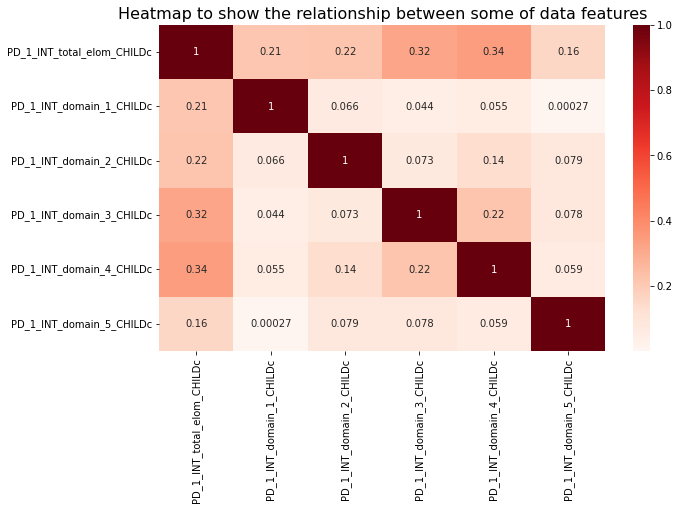

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(Elom_CHILDc.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap to show the relationship between some of data features', fontsize=16)
plt.show()

PD_1_INT_domain_3_CHILD **Emergent Numeracy and Mathematics** & PD_1_INT_domain_4_CHILD **Cognition and Executive Functionseem** to be strongly correlated to the PD_1_INT_total_elom_CHILD

Why these two domains?
-domain_3 was expected as the literature has documented it's impact on children thriving

## Composite scores....PD_4_INT

In [38]:
PD4 = new_df[['PD_4_INT_CHILD','PD_4_INT_composite_ward','PD_4_INT_composite_facility','PD_4_INT_composite_dc','PD_4_INT_composite_mn']]
PD4.head()

,PD_4_INT_CHILD,PD_4_INT_composite_ward,PD_4_INT_composite_facility,PD_4_INT_composite_dc,PD_4_INT_composite_mn
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [39]:
PD4.isnull().sum()

PD_4_INT_CHILD                 0
PD_4_INT_composite_ward        0
PD_4_INT_composite_facility    0
PD_4_INT_composite_dc          0
PD_4_INT_composite_mn          0
dtype: int64

In [40]:
PD4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 11821
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PD_4_INT_CHILD               11822 non-null  category
 1   PD_4_INT_composite_ward      11822 non-null  category
 2   PD_4_INT_composite_facility  11822 non-null  category
 3   PD_4_INT_composite_dc        11822 non-null  category
 4   PD_4_INT_composite_mn        11822 non-null  category
dtypes: category(5)
memory usage: 408.7 KB


In [41]:
PD4['PD_4_INT_CHILD'].value_counts()

Non-deviant         11605
Positive deviant      217
Name: PD_4_INT_CHILD, dtype: int64

In [42]:
PD4['PD_4_INT_composite_mn'].value_counts()  

Non-deviant         11178
Positive deviant      644
Name: PD_4_INT_composite_mn, dtype: int64

In [43]:
#Convert categorical variables to numerical
PD4['PD_4_INT_CHILDc'] = PD4['PD_4_INT_CHILD'].apply(my_recode)
PD4['PD_4_INT_composite_wardc'] = PD4['PD_4_INT_composite_ward'].apply(my_recode)
PD4['PD_4_INT_composite_facilityc'] = PD4['PD_4_INT_composite_facility'].apply(my_recode)
PD4['PD_4_INT_composite_dcc'] = PD4['PD_4_INT_composite_dc'].apply(my_recode)
PD4['PD_4_INT_composite_mnc'] = PD4['PD_4_INT_composite_mn'].apply(my_recode)


C:\Users\karas\AppData\Local\Temp/ipykernel_17948/1649512466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD4['PD_4_INT_CHILDc'] = PD4['PD_4_INT_CHILD'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_17948/1649512466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD4['PD_4_INT_composite_wardc'] = PD4['PD_4_INT_composite_ward'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_17948/1649512466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [44]:
PD4_df = PD4.drop(['PD_4_INT_CHILD','PD_4_INT_composite_ward','PD_4_INT_composite_facility','PD_4_INT_composite_dc','PD_4_INT_composite_mn'], axis =1)
PD4_df.head()

,PD_4_INT_CHILDc,PD_4_INT_composite_wardc,PD_4_INT_composite_facilityc,PD_4_INT_composite_dcc,PD_4_INT_composite_mnc
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [45]:
#Convert categorical variables to numerical variables
PD4_df['PD_4_INT_CHILDc'] = pd.factorize(PD4_df['PD_4_INT_CHILDc'])[0]
PD4_df['PD_4_INT_composite_wardc'] = pd.factorize(PD4_df['PD_4_INT_composite_wardc'])[0]
PD4_df['PD_4_INT_composite_facilityc'] = pd.factorize(PD4_df['PD_4_INT_composite_facilityc'])[0]
PD4_df['PD_4_INT_composite_dcc'] = pd.factorize(PD4_df['PD_4_INT_composite_dcc'])[0]
PD4_df['PD_4_INT_composite_mnc'] = pd.factorize(PD4_df['PD_4_INT_composite_mnc'])[0]


In [47]:
PD4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 11821
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   PD_4_INT_CHILDc               11822 non-null  int64
 1   PD_4_INT_composite_wardc      11822 non-null  int64
 2   PD_4_INT_composite_facilityc  11822 non-null  int64
 3   PD_4_INT_composite_dcc        11822 non-null  int64
 4   PD_4_INT_composite_mnc        11822 non-null  int64
dtypes: int64(5)
memory usage: 812.2 KB


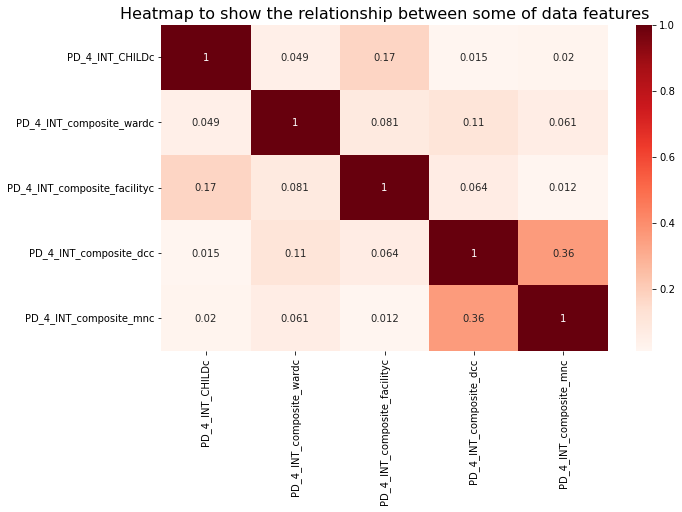

In [48]:
#Correlation of the variables
plt.figure(figsize=(10,6))
sns.heatmap(PD4_df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap to show the relationship between some of data features', fontsize=16)
plt.show()

There is a notable relationship (R^2 =0.17) between **CHILD** and **facility**.......This perhaps tells us that the nature of the facilities contribute to some extent to the overall outcomes of children progress in their development

### Assess facility vs domains

In [49]:
FD_df = new_df[['PD_1_INT_total_elom_facility','PD_1_INT_domain_1_facility','PD_1_INT_domain_2_facility','PD_1_INT_domain_3_facility','PD_1_INT_domain_4_facility','PD_1_INT_domain_5_facility']]
FD_df.head()

,PD_1_INT_total_elom_facility,PD_1_INT_domain_1_facility,PD_1_INT_domain_2_facility,PD_1_INT_domain_3_facility,PD_1_INT_domain_4_facility,PD_1_INT_domain_5_facility
0,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
1,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
2,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
3,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant
4,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant,Non-deviant


In [50]:
FD_df.isnull().sum()

PD_1_INT_total_elom_facility    0
PD_1_INT_domain_1_facility      0
PD_1_INT_domain_2_facility      0
PD_1_INT_domain_3_facility      0
PD_1_INT_domain_4_facility      0
PD_1_INT_domain_5_facility      0
dtype: int64

In [51]:
FD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 11821
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   PD_1_INT_total_elom_facility  11822 non-null  category
 1   PD_1_INT_domain_1_facility    11822 non-null  category
 2   PD_1_INT_domain_2_facility    11822 non-null  category
 3   PD_1_INT_domain_3_facility    11822 non-null  category
 4   PD_1_INT_domain_4_facility    11822 non-null  category
 5   PD_1_INT_domain_5_facility    11822 non-null  category
dtypes: category(6)
memory usage: 420.4 KB


In [53]:
#Convert categorical variables to numerical
FD_df['PD_1_INT_total_elom_facilityx'] = FD_df['PD_1_INT_total_elom_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_1_facilityx'] = FD_df['PD_1_INT_domain_1_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_2_facilityx'] = FD_df['PD_1_INT_domain_2_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_3_facilityx'] = FD_df['PD_1_INT_domain_3_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_4_facilityx'] = FD_df['PD_1_INT_domain_4_facility'].apply(my_recode)
FD_df['PD_1_INT_domain_5_facilityx'] = FD_df['PD_1_INT_domain_5_facility'].apply(my_recode)

C:\Users\karas\AppData\Local\Temp/ipykernel_17948/946570214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FD_df['PD_1_INT_total_elom_facilityx'] = FD_df['PD_1_INT_total_elom_facility'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_17948/946570214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FD_df['PD_1_INT_domain_1_facilityx'] = FD_df['PD_1_INT_domain_1_facility'].apply(my_recode)
C:\Users\karas\AppData\Local\Temp/ipykernel_17948/946570214.py:4: SettingWithCopyWarning: 
A value i

In [54]:
FD_new = FD_df.drop(['PD_1_INT_total_elom_facility','PD_1_INT_domain_1_facility','PD_1_INT_domain_2_facility','PD_1_INT_domain_3_facility','PD_1_INT_domain_4_facility','PD_1_INT_domain_5_facility'], axis =1)
FD_new.head()

,PD_1_INT_total_elom_facilityx,PD_1_INT_domain_1_facilityx,PD_1_INT_domain_2_facilityx,PD_1_INT_domain_3_facilityx,PD_1_INT_domain_4_facilityx,PD_1_INT_domain_5_facilityx
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [55]:
FD_new.columns

Index(['PD_1_INT_total_elom_facilityx', 'PD_1_INT_domain_1_facilityx',
       'PD_1_INT_domain_2_facilityx', 'PD_1_INT_domain_3_facilityx',
       'PD_1_INT_domain_4_facilityx', 'PD_1_INT_domain_5_facilityx'],
      dtype='object')

In [56]:
FD_new['PD_1_INT_total_elom_facilityx']= pd.factorize(FD_new['PD_1_INT_total_elom_facilityx'])[0]
FD_new['PD_1_INT_domain_1_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_1_facilityx'])[0]
FD_new['PD_1_INT_domain_2_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_2_facilityx'])[0]
FD_new['PD_1_INT_domain_3_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_3_facilityx'])[0]
FD_new['PD_1_INT_domain_4_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_4_facilityx'])[0]
FD_new['PD_1_INT_domain_5_facilityx']= pd.factorize(FD_new['PD_1_INT_domain_5_facilityx'])[0]


In [57]:
FD_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 0 to 11821
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   PD_1_INT_total_elom_facilityx  11822 non-null  int64
 1   PD_1_INT_domain_1_facilityx    11822 non-null  int64
 2   PD_1_INT_domain_2_facilityx    11822 non-null  int64
 3   PD_1_INT_domain_3_facilityx    11822 non-null  int64
 4   PD_1_INT_domain_4_facilityx    11822 non-null  int64
 5   PD_1_INT_domain_5_facilityx    11822 non-null  int64
dtypes: int64(6)
memory usage: 904.6 KB


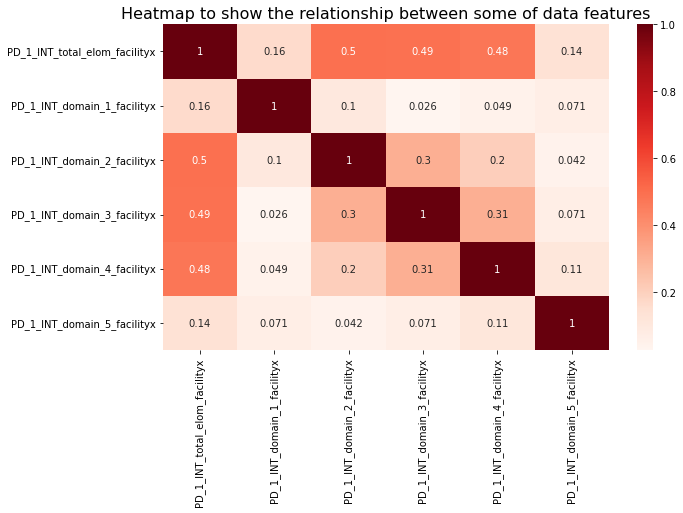

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(FD_new.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap to show the relationship between some of data features', fontsize=16)
plt.show()

We can see from the heatmap that domains 2 **(Fine Motor Coordination: Category)**, 3 **(Emergent Numeracy/Maths: Category)** & 4 **(Cognition and EF: Category)** are strongly correlated to the facility

### Notes

Around 8 percent of ECD facilities lack proper infrastructure (Martin et al, 2014)|: **Mbarathi et al 016**

The national audit on ECD centres (2014) show most facilities remain unregistered with the
Department of Social Development (DSD) because they fail to meet the standards presented
by the department. For an ECD to be registered, the infrastructural conditions should be according to the set DSD requirements